In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Exploration

In [3]:
df_train = pd.read_csv("train.csv")

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:>

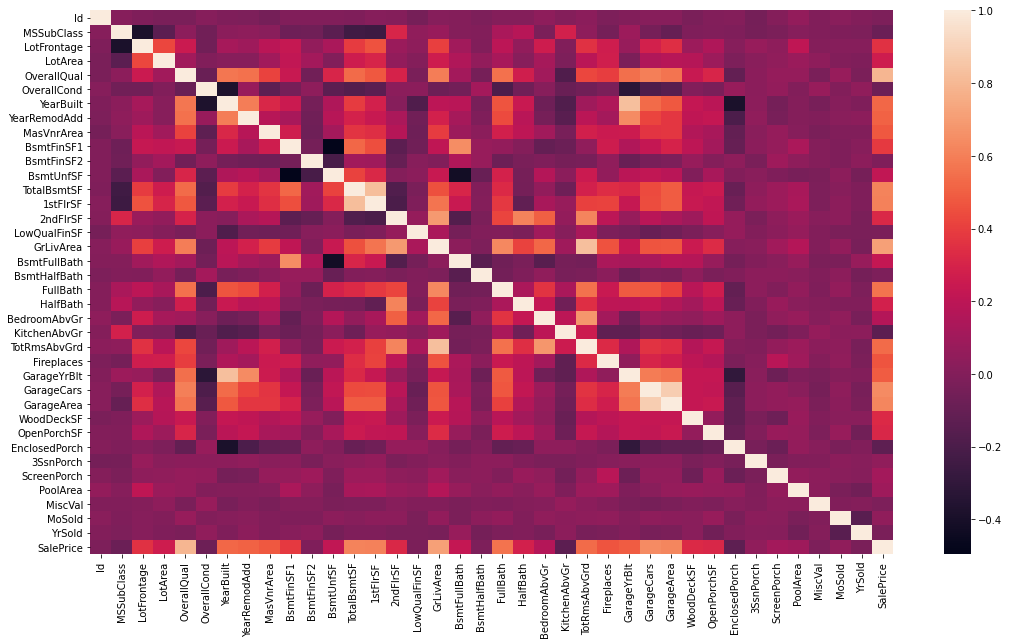

In [6]:
df_train_corr = df_train.corr()
plt.figure(figsize=(18,10))
sns.heatmap(df_train_corr)

We find that there is a strong corrolation between OverallQual, GrLivArea and the SalePrice which makes sense. The better and bigger the house the more expensive it would be.

Reading though multiple submission, I found that there are some outliers in the data that are very extreme. The strongest ones are in the GrLivArea.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

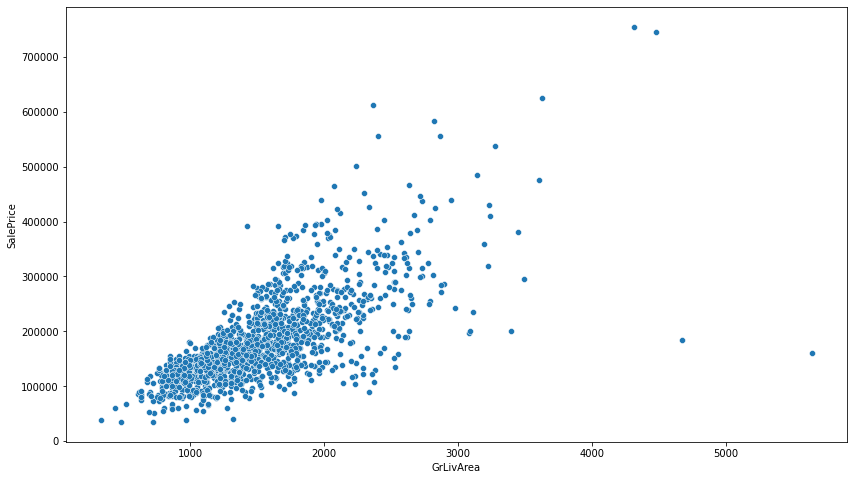

In [7]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=df_train,x='GrLivArea',y='SalePrice')

The people that bought these houses got a bargain. However, we cannot use these values in our data since they are not a representation of how SalePrice evolves with GrLivArea. So we can just drop them from the training set.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

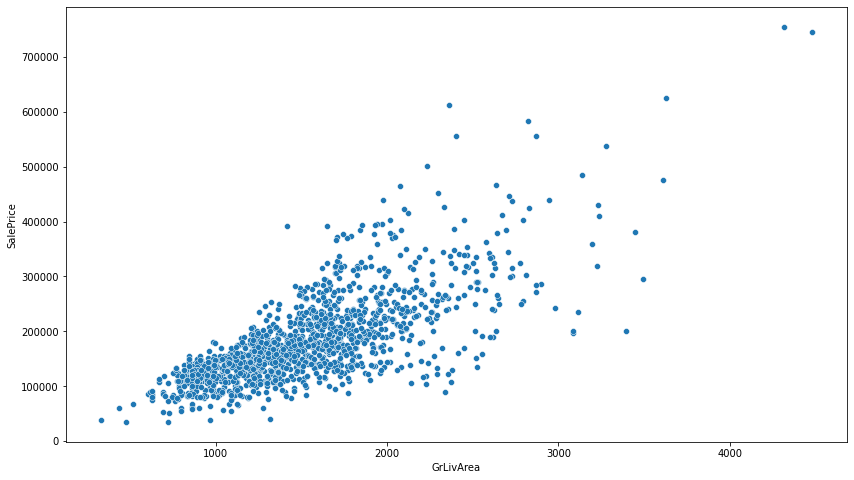

In [8]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

#Check the graphic again
plt.figure(figsize=(14,8))
sns.scatterplot(data=df_train,x='GrLivArea',y='SalePrice')

No more annoying outliers, we can continue with our discovery of the data. Looking at the OverallQual next.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

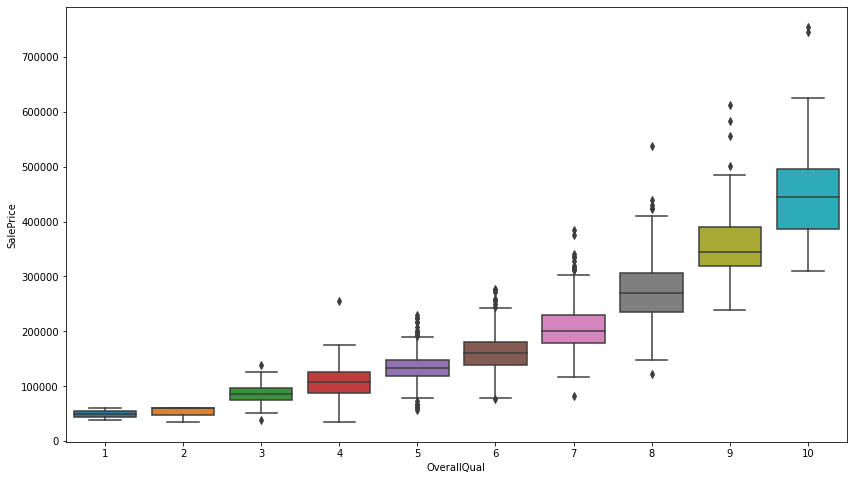

In [9]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df_train,y='SalePrice',x='OverallQual')

The higher the quality the more expensive the house. Which is to be expected.
We can also observe how the YearBuilt affects pricing.

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

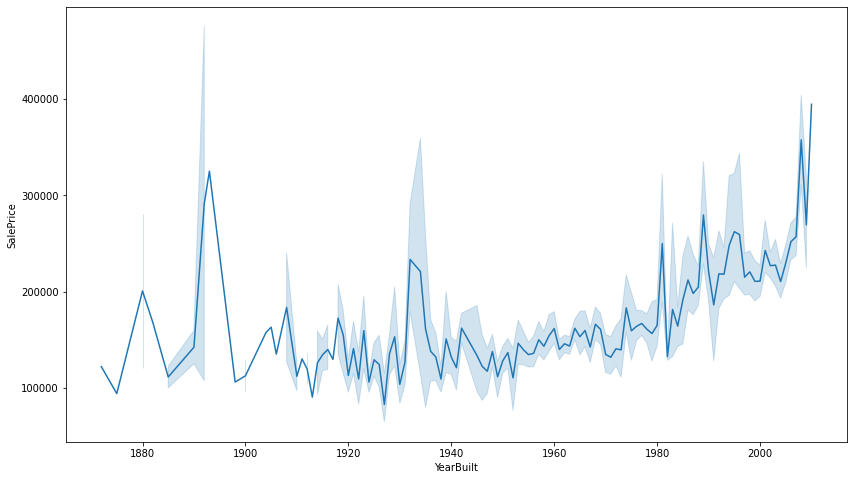

In [10]:
plt.figure(figsize=(14,8))
sns.lineplot(data=df_train,x='YearBuilt',y='SalePrice')

/home/bassel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

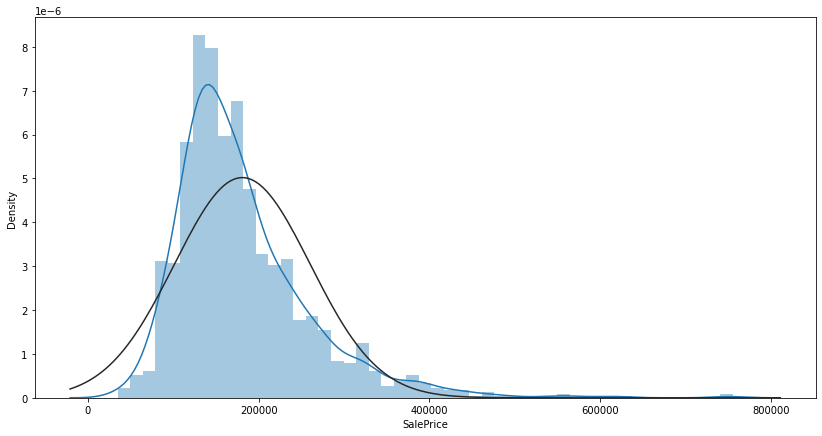

In [11]:
from scipy.stats import norm, skew
from scipy import stats

plt.figure(figsize=(14,7))
sns.distplot(df_train['SalePrice'] , fit=norm)


 mu = 180932.92 and sigma = 79467.79



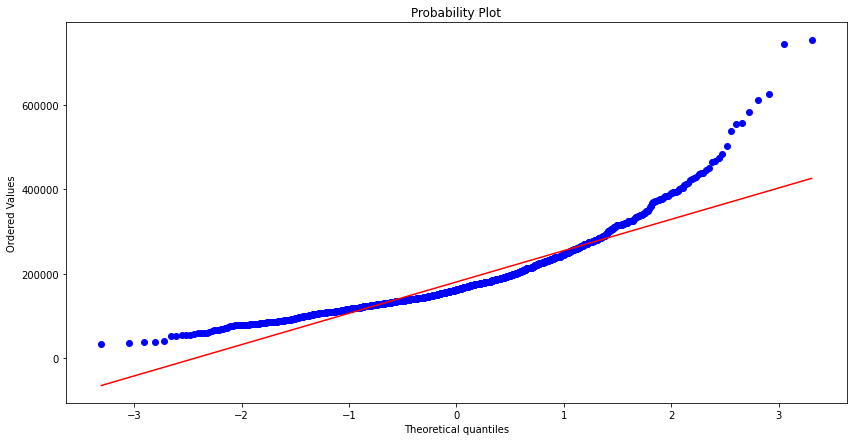

In [12]:
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.figure(figsize=(14,7))
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

The data is skewed to the right, using log is an easy fix to get a normal distributed dataset.

/home/bassel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

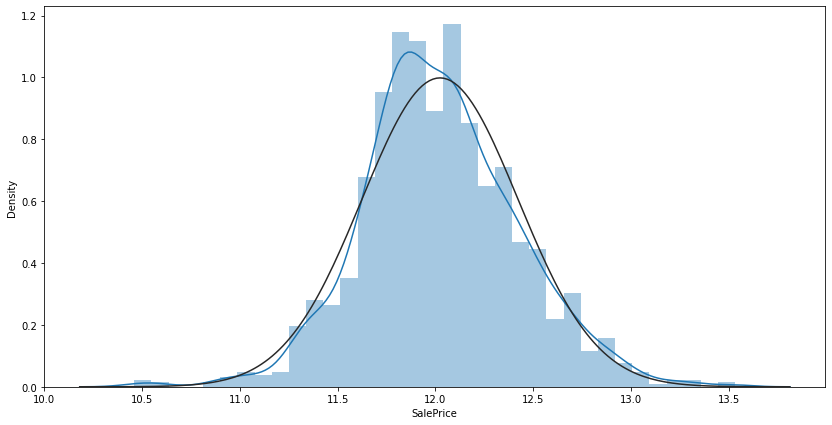

In [13]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])
plt.figure(figsize=(14,7))
sns.distplot(df_train['SalePrice'] , fit=norm)


 mu = 12.02 and sigma = 0.40



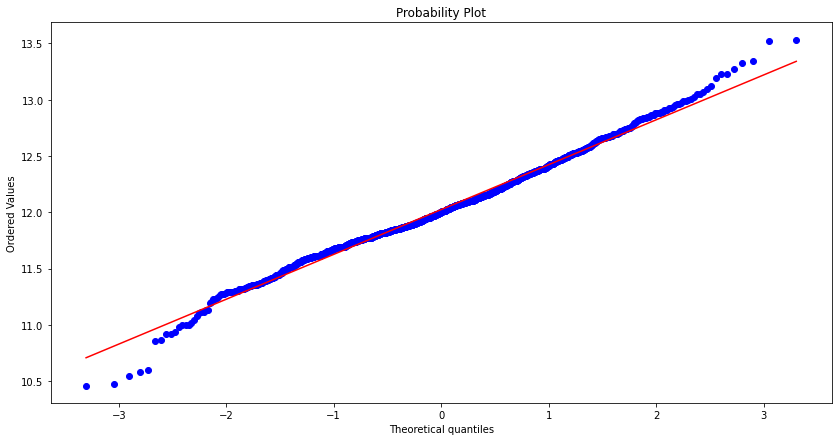

In [14]:
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.figure(figsize=(14,7))
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

Much better.

# Data Engineering

Next we have a look at the missing data, and try to feature engineer what we can.

In [15]:
is_null = pd.DataFrame((100*df_train.isna().sum())/len(df_train),columns={'isNull'})
null_values = is_null.sort_values(by='isNull',ascending=False).head(19)
null_values.head(19)

,isNull
PoolQC,99.588477
MiscFeature,96.296296
Alley,93.758573
Fence,80.727023
FireplaceQu,47.325103
LotFrontage,17.764060
GarageYrBlt,5.555556
GarageCond,5.555556
GarageType,5.555556
GarageFinish,5.555556


In [17]:
df_test=pd.read_csv('test.csv')

In [18]:
id_train = df_train.pop('Id')
id_test = df_test.pop('Id')

In [19]:
test_is_null = pd.DataFrame((100*df_test.isna().sum())/len(df_test),columns={'isNull'})
test_null_values = test_is_null.sort_values(by='isNull',ascending=False).head(33)
test_null_values.head(19)

,isNull
PoolQC,99.794380
MiscFeature,96.504455
Alley,92.666210
Fence,80.123372
FireplaceQu,50.034270
LotFrontage,15.558602
GarageYrBlt,5.346127
GarageFinish,5.346127
GarageQual,5.346127
GarageCond,5.346127


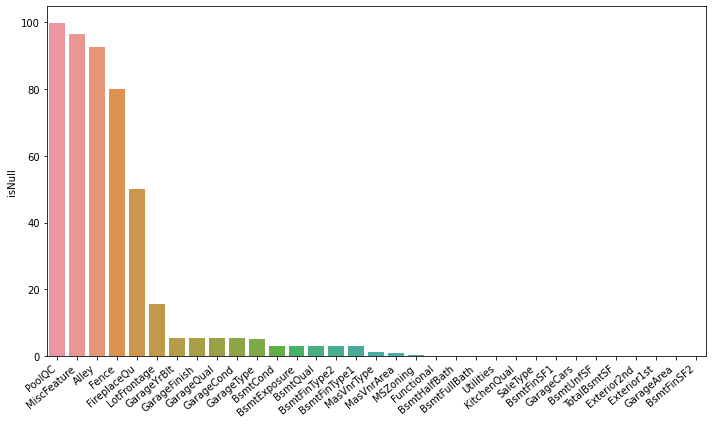

In [20]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x = test_null_values.index,y = test_null_values.isNull)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

In [21]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train.SalePrice.values
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


In [22]:
all_data_is_null = pd.DataFrame((100*all_data.isna().sum())/len(all_data),columns={'isNull'})
all_data_null_values = all_data_is_null.sort_values(by='isNull',ascending=False).head(33)
all_data_null_values.head(19)

,isNull
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageYrBlt,5.450806
GarageFinish,5.450806
GarageQual,5.450806
GarageCond,5.450806


For the following columns, the dataset tells us that they are all missing data are none.

In [23]:
for col in ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','MSSubClass']:
    all_data[col] = all_data[col].fillna('None')

Assuming that the houses have the same size in the same neighborhood, we can take the median of the Lotfrontage in the same neighborhood and give that value to the houses with missing lotfrontage values.

In [24]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

Again, as stated in the dataset the missing data is none or 0 depending on the type of the column.

In [25]:
for col in ['GarageCond','GarageFinish','GarageType','GarageQual','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtCond']:
    all_data[col] = all_data[col].fillna('None')
    
for col in ['GarageYrBlt','GarageCars','GarageArea','TotalBsmtSF','BsmtUnfSF','BsmtFullBath','BsmtHalfBath','BsmtFinSF1','BsmtFinSF2']:
    all_data[col] = all_data[col].fillna(0).astype(int)

Exterior 1 and 2 only have one missing value we can replace them with the most occuring value.

In [26]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

According to the dataset, if Functional is missing we should replace it with Typ

In [27]:
all_data['Functional'] = all_data['Functional'].fillna(all_data['Functional'].mode()[0])

Since the utilities is the same in all the train cases but one, we can just drop this column.

In [28]:
print(df_train['Utilities'].unique())
df_train[df_train['Utilities'] == 'NoSeWa']

['AllPub' 'NoSeWa']


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
944,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,NoSeWa,CulDSac,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,11.831386


In [29]:
all_data.drop('Utilities', axis = 1, inplace = True)

We can replace the missing Electrical values with the most occuring value.

In [30]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

The same can be done for KitchenQual, SaleType and MSZoning

In [31]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

For the venir we can assume that if they are missing, they there were none used. We can then just fill the missing venir area with 0.

In [32]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0).astype(int)

Since general living area only takes into account the ground floor, one should take into account the basements and 1st/ 2nd floor to the total size of the house.


In [33]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [34]:
all_data_is_null = pd.DataFrame((100*all_data.isna().sum())/len(all_data),columns={'isNull'})
all_data_null_values = all_data_is_null.sort_values(by='isNull',ascending=False).head(33)
all_data_null_values.head(5)

,isNull
MSSubClass,0.0
KitchenAbvGr,0.0
GarageYrBlt,0.0
GarageType,0.0
FireplaceQu,0.0


Next we need to convert the wrongly classified columns from numerical to categorical.

In [35]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

Getting the dummy variables for the whole dataset.

In [58]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 338)


Dividing the data into training and testing data, we can use the ntrain value that we kept earlier

In [37]:
train = all_data[:ntrain]
test = all_data[ntrain:]

# Model 

Importing the necessary libraries for the model creation

In [38]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [39]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [40]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [41]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [42]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [43]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [44]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [45]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1120 (0.0059)



In [46]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1120 (0.0061)



In [47]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1187 (0.0077)



## Avereging Models

We can try to make a averging model so that we get better performance. A good read about this subject can be found [here](https://www.kdnuggets.com/2017/02/stacking-models-imropved-predictions.html).

In [48]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [49]:
averaged_models = AveragingModels(models = (ENet, GBoost, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1099 (0.0062)



We find an improvement on the earlier data

In [50]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

Finally we can use all the models that we created to get the final submission.

In [51]:
averaged_models.fit(train.values, y_train)
stacked_train_pred = averaged_models.predict(train.values)
stacked_pred = np.expm1(averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.07840670795856194


In [52]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

[13:01:56] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.079175253619463


In [53]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
0.07274439331512508


In [54]:
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.07561824037415807


In [55]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [56]:
sub = pd.DataFrame()
sub['Id'] = id_test
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)

In [57]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m "Message"

100%|██████████████████████████████████████| 33.6k/33.6k [00:02<00:00, 13.3kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques